<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/linear/Housing_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing Kaggle Datasheet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
table = pd.read_csv('Housing.csv')

In [ ]:
table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(table.info())
print('The number of columns are',len(table.columns))
table.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
The number of columns are 13


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
table.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
table['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

Visualizing Data



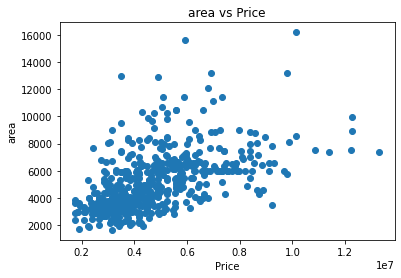

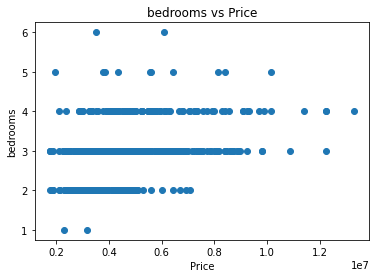

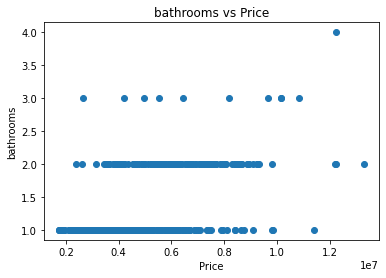

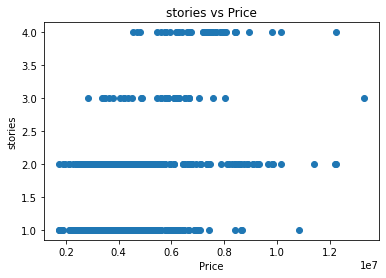

In [ ]:
#visualise the data 
import matplotlib.pyplot as plt
%matplotlib inline
#using scatter plot
def scatter_plot(x):
    
    plt.scatter(table['price'], table[x])
    plt.title(x +' vs Price') #title of the graph
    plt.xlabel('Price') #x-axis
    plt.ylabel(x) #y-axis
    plt.show()


scatter_plot('area') 
scatter_plot('bedrooms') 
scatter_plot('bathrooms') 
scatter_plot('stories') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


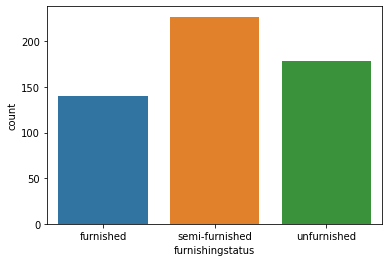

In [ ]:
plt1 = sns.countplot('furnishingstatus', data=table)

Manipulating the Categorized data

In [ ]:
table['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
table["mainroad"]= table["mainroad"].replace("yes",1)
table["mainroad"]= table["mainroad"].replace("no",0)

In [ ]:
table["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
table["guestroom"]= table["guestroom"].replace("yes",1)
table["guestroom"]= table["guestroom"].replace("no",0)

In [ ]:
table["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
table["basement"]= table["basement"].replace("yes",1)
table["basement"]= table["basement"].replace("no",0)

In [ ]:
print(table["hotwaterheating"].value_counts())
print(table["airconditioning"].value_counts())
print(table["prefarea"].value_counts())
print(table["furnishingstatus"].value_counts())


no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [ ]:
table["hotwaterheating"]= table["hotwaterheating"].replace("yes",1)
table["hotwaterheating"]= table["hotwaterheating"].replace("no",0)

table["airconditioning"]= table["airconditioning"].replace("yes",1)
table["airconditioning"]= table["airconditioning"].replace("no",0)

table["prefarea"]= table["prefarea"].replace("yes",1)
table["prefarea"]= table["prefarea"].replace("no",0)

table["furnishingstatus"]= table["furnishingstatus"].replace("semi-furnished",0)
table["furnishingstatus"]= table["furnishingstatus"].replace("unfurnished",1)
table["furnishingstatus"]= table["furnishingstatus"].replace("furnished",2)

In [ ]:
table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


Applying Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = table.drop(columns="price")
Y = table.price

In [ ]:
print(X.shape," ",Y.shape)

(545, 12)   (545,)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 )

In [ ]:
from sklearn.linear_model import LinearRegression as l_reg

In [ ]:
model = l_reg()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
x = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,x)

0.7314293407932518

Accuracy is :  0.7314293407932518


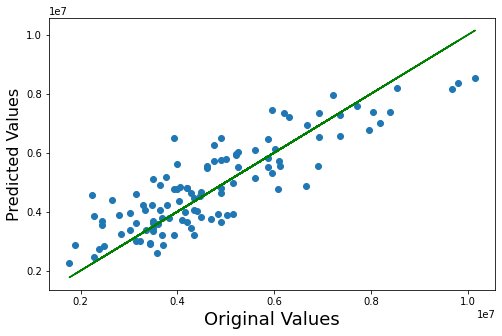

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(8,5))
plt.scatter(Y_test, x) 
plt.xlabel('Original Values', fontsize = 18)                          # X-label
plt.ylabel('Predicted Values', fontsize = 16)      
plt.plot(Y_test, Y_test, color="g")

print("Accuracy is : ",r2_score(Y_test,x))